# A tutorial on statistical-learning for scientific data processing

## Model selection: choosing estimators and their parameters

### Score, and cross-validated scores

In [1]:
from sklearn import datasets, svm

In [2]:
X_digits, y_digits = datasets.load_digits(return_X_y = True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [17]:
import numpy as np 
num = 18
X_folds = np.array_split(X_digits, num)
y_folds = np.array_split(y_digits, num)
scores = []
print(X_digits.shape)
print(type(X_folds))
print(list(X_folds).pop(0).shape, list(y_folds).pop(0).shape)
print(len(list(y_folds)))
print(list(y_folds).pop(0))
print(list(y_folds).pop(1))
print(list(y_folds).pop(2))

(1797, 64)
<class 'list'>
(100, 64) (100,)
18
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]
[4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7
 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9]
[1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7
 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7]


In [18]:
for k in range(num):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.92, 0.98, 0.99, 1.0, 0.94, 0.98, 0.98, 0.98, 0.96, 0.99, 0.98, 0.96, 0.96, 1.0, 0.98, 0.9191919191919192, 0.9494949494949495, 0.9797979797979798]


### Cross-validation generators

In [27]:
from sklearn.model_selection import KFold, cross_val_score
X = np.array(["a", "a", "a", "b", "b", "c", "c", "c", "c", "c", "d"])
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test : %s' % (train_indices, test_indices))
    print(X[test_indices])

Train: [ 3  4  5  6  7  8  9 10] | test : [0 1 2]
['a' 'a' 'a']
Train: [ 0  1  2  5  6  7  8  9 10] | test : [3 4]
['b' 'b']
Train: [ 0  1  2  3  4  7  8  9 10] | test : [5 6]
['c' 'c']
Train: [ 0  1  2  3  4  5  6  9 10] | test : [7 8]
['c' 'c']
Train: [0 1 2 3 4 5 6 7 8] | test : [ 9 10]
['c' 'd']


In [29]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [31]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

**Cross-validation on Digits Dataset Execrcise**

In [32]:
print(__doc__)

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

Automatically created module for IPython interactive environment


In [33]:
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=-1)
    print(this_scores)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

[0.1013289  0.10183639 0.26342282]
[0.1013289  0.10183639 0.26342282]
[0.1013289  0.10183639 0.26342282]
[0.1013289  0.10183639 0.26342282]
[0.1013289  0.10183639 0.26342282]
[0.90697674 0.9015025  0.89932886]
[0.95348837 0.96160267 0.9295302 ]
[0.93853821 0.95826377 0.93791946]
[0.93521595 0.95826377 0.93791946]
[0.93521595 0.95826377 0.93791946]


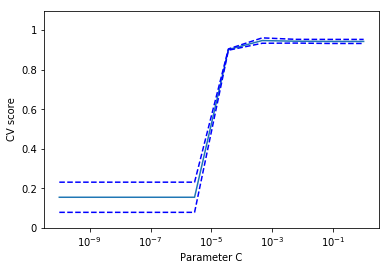

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

In [36]:
C_s

array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00])

### Grid-search and cross-validated estimators

**Grid-search**

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [40]:
Cs = np.logspace(-6, -1, 10)

In [41]:
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)

In [42]:
dict(C=Cs)

{'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
        1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
        2.78255940e-02, 1.00000000e-01])}

In [43]:
clf

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
clf.fit(X_digits[:1000], y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
clf.best_score_

0.925

In [48]:
clf.best_params_

{'C': 0.007742636826811277}

In [49]:
clf.best_estimator_

SVC(C=0.007742636826811277, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
clf.best_estimator_.C

0.007742636826811277

In [51]:
clf.score(X_digits[1000:], y_digits[1000:])

0.9435382685069009

**Cross-validated estimators**

In [52]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [53]:
lasso.alpha_

0.012291895087486173

In [55]:
lasso.alpha_

0.012291895087486173

**Exercise**

In [57]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

In [61]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, 0.5, 30)

tuned_parameters = [dict(alpha=alphas)]
n_folds = 5

In [62]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print(scores)

[ 0.39638051  0.39654903  0.39678939  0.39713198  0.39761956  0.39831237
  0.39929414  0.40067986  0.40262534  0.40510719  0.4079445   0.41171128
  0.41687654  0.42077512  0.42225458  0.42393911  0.42594913  0.42907712
  0.43240055  0.43267418  0.4282147   0.41766182  0.39589332  0.35659185
  0.32551445  0.28182839  0.19552451  0.04638911 -0.09530243 -0.09530243]


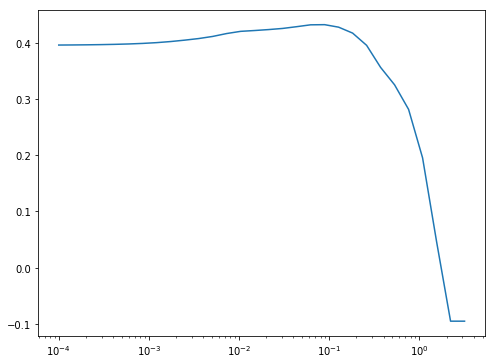

In [63]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

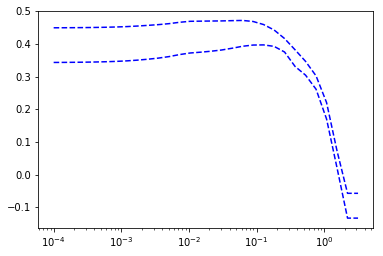

In [64]:
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

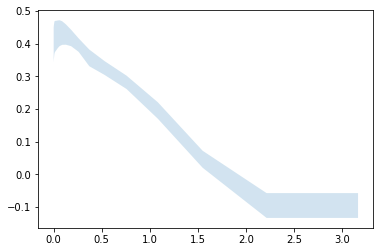

In [65]:
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

(0.0001, 3.1622776601683795)

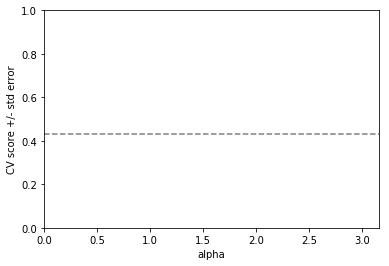

In [67]:
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [69]:
lasso_cv =LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold =KFold(3)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
plt.show()

[fold 0] alpha: 0.08877, score: 0.53825
[fold 1] alpha: 0.06210, score: 0.16395
[fold 2] alpha: 0.08877, score: 0.44917
